Kelompok 4 - Batch 5
Members:

1. Wesly Daud Siahaan
2. RIZKI NURHAFIZD ACHMAD
3. DWI MUTIARA SENEN
4. Muhammad Luthfi Nurhadi
5. CHELLCIA MUTIARA IWFANKA
6. ARZAD LINTANG MAHARANI
7. MUHAMMAD FATHUR ARKANA
8. Saniyah Rizkiyah

# Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# sklearn import for data pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# sklearn import for LogisticRegression and RandomForest algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ignore warnings( not suggested for real-life projects)
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [8]:
from google.colab import files
uploaded = files.upload()

In [10]:
df_original = pd.read_excel('E Commerce Dataset.xlsx')
df=df_original.copy()
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [11]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Tenure','CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore', 'DaySinceLastOrder','NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'CashbackAmount']
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00


Beberapa kolom/feature sudah cukup simetrik distribusinya (mean dan median tidak terlalu jauh), namun ada beberapa kolom yang  skew, dilihat dari nilai mean dan median ---->        "mean>median" = skew ke kanan (akan kita lihat visualisasi nya di bawah) yaitu kolom `Tenure`, `WareHouseToHome`, `OrderCount`,`DaySinceLastOrder`,`CashbackAmount`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`  dst . kolom-kolom ini mungkin dapat dilakukan log transformation nantinya.

In [ ]:
df[cats].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


1. Customer di dominasi oleh pria.
2. customer mayoritas lebih memilih login melalui mobile phone
3. metode pembayaran yang digunakan kebanyakan dengan metode debit card
4. kategori produk yang diorder mayoritas adalah laptop dan aksesoris
5. Mayoritas customer berstatus menikah.

### A. Handling Missing Values

In [ ]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
CustomerID                     0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
Churn                          0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64

<b> Note :
* Untuk kolom/feature yang memiliki missing value, karena nilai null > 5% data, maka akan dilakukan imputation berdasarkan sebaran/distribusi datanya. jika data skew ke kanan (mean>median), maka digunakan nilai median karena nilai median robust terhadap outlier. jika mean< median, digunakan nilai mean.
* ada opsi lain untuk proses imputation ini, yaitu menggunakan nilai IQR (Q3-Q1) yang juga robust terhadap outlier. dalam case ini, kami hanya menggunakan nilai median dan mean saja.

Berikut adalah strategi kita mengatasi missing values pada setiap kolom.
<br>

* `DaySinceLastOrder` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)
* `OrderAmountHikeFromlastYear` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)
* `Tenure ` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)
* `OrderCount` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)
* `CouponUsed`\: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)
* `HourSpendOnApp`\: impute dengan nilai average (dari `df.describe` kita tau distribusinya mendekati normal)
* `WarehouseToHome`\: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)

##### PROSES IMPUTASI

In [ ]:
# Impute DaySinceLastOrder, OrderAmountHikeFromlastYear, Tenure, OrderCount, CouponUsed, dan WarehouseToHome dengan median
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)

In [ ]:
#missing value kolom `HourSpendOnApp` diisi dengan mean, karena pada deskriptif statistiknya mean<median.
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean(), inplace=True)

In [ ]:
# cek jumlah missing data setelah preprocessing
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.931535,0.705384,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,2.00,3.00,7.0000,46.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.716874,1.857640,0.0,1.00,1.00,2.0000,16.00


deskriptif statistik setelah proses imputasi tidak berubah secara signifikan. data setelah imputasi relatif masih mendekati nilai originalnya sebelum imputasi.

### B. Duplicated Data

In [ ]:
# cek jumlah duplicated rows
# dari semua kolom
print('Jumlah data yang duplikat adalah :', df.duplicated().sum())

Jumlah data yang duplikat adalah : 0


In [ ]:
# cek jumlah duplicated rows --> COBA-COBA
# dari 3 kolom saja (CustomerID, Churn, Complain)
df.duplicated(subset=['CustomerID', 'Churn', 'Complain']).sum()

0

In [ ]:
# Split data into numerical and categorical
nums = ['Churn','Tenure','DeviceRegistered','SatisfactionScore','Complain','DaySinceLastOrder','Cashback',
        'WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']
cats = ['LoginDevice','CityTier','PayMethod','Gender','OrderCat','Status']

<b> Karena tidak ada data yang duplikat, maka selanjutnya dilakukan handling outliers

### C. Outliers Handling

<!-- Buat copy dataset yang sudah dilakukan Handling Missing Value dan Handling Duplicated Data -->

In [ ]:
# Semua tipe data sudah sesuai, tetapi untuk memudahkan dalam mengolah data, kami mengganti nama column menjadi lebih simpel
df = df.rename(columns={'PreferredPaymentMode': 'PayMethod',
 'MaritalStatus': 'Status',
 'PreferredLoginDevice': 'LoginDevice',
'PreferedOrderCat': 'OrderCat',
'NumberOfDeviceRegistered' :
'DeviceRegistered',
 'CashbackAmount' : 'Cashback',
'OrderAmountHikeFromlastYear' :
'%IncreaseOrderLY'})

In [ ]:
#nums1 tanpa kolom 'Churn'
nums1 = ['Tenure','DeviceRegistered','SatisfactionScore','DaySinceLastOrder','Cashback',
        'WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']

In [ ]:
# Periksa Deskripsi Statistik sebelum menangani outlier
df[nums1].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
DeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,2.00,3.00,7.0000,46.00
Cashback,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
HourSpendOnApp,5630.0,2.931535,0.705384,0.0,2.00,3.00,3.0000,5.00
%IncreaseOrderLY,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.716874,1.857640,0.0,1.00,1.00,2.0000,16.00


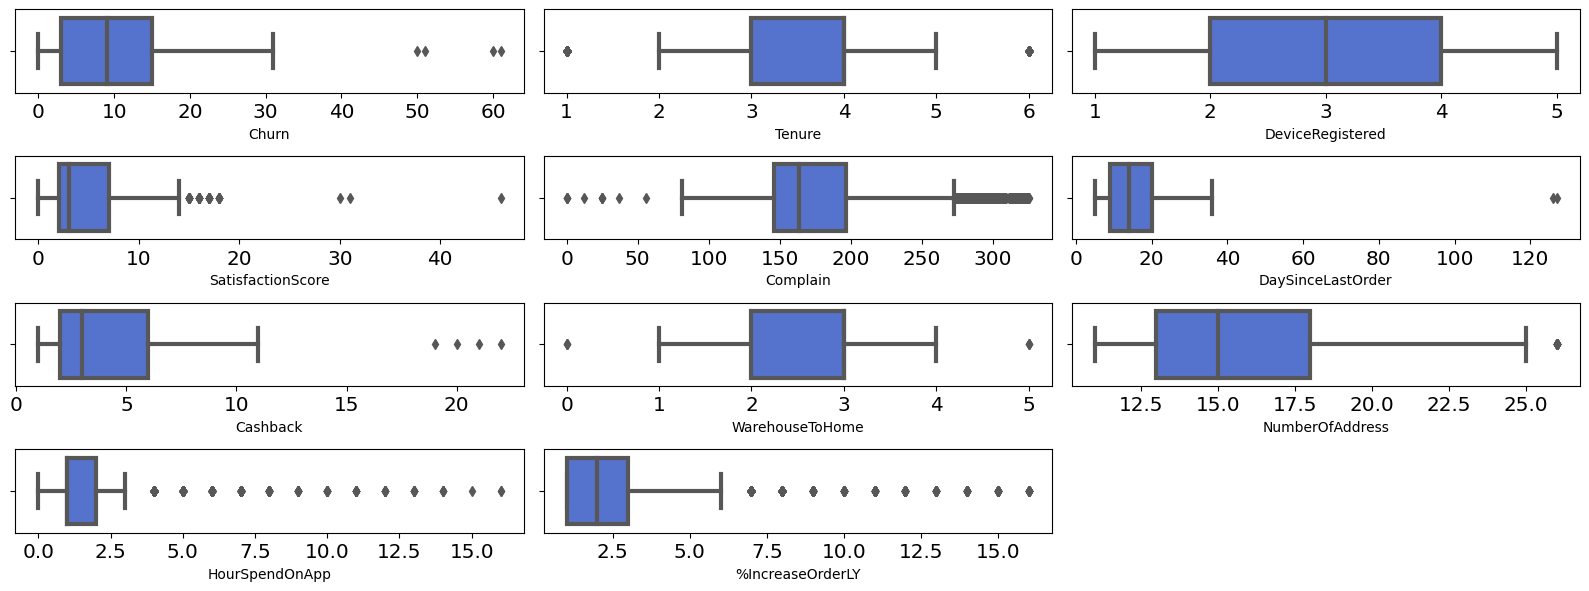

In [ ]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[nums1[i]], color='royalblue')
    plt.xlabel(nums[i])
    plt.tight_layout()

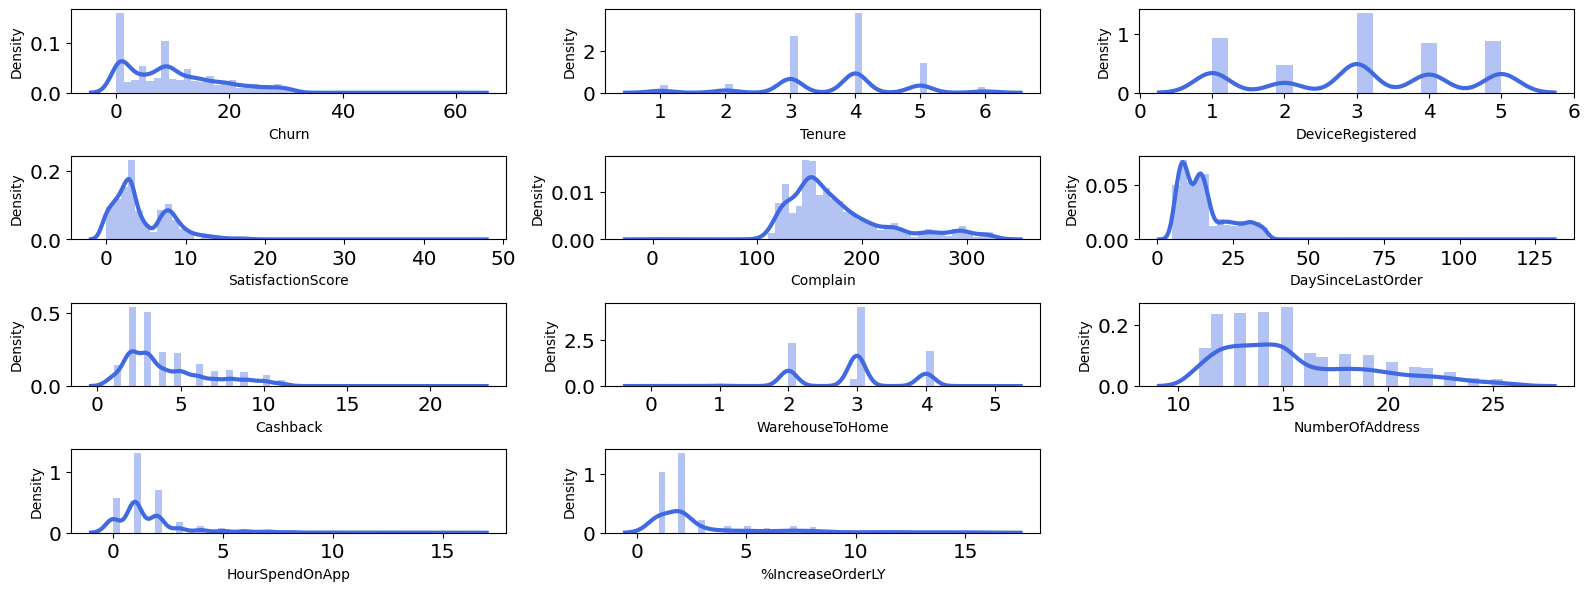

In [ ]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=df[nums1[i]], color='royalblue')
    plt.xlabel(nums[i])
    plt.tight_layout()

In [ ]:
feat_otl = ['WarehouseToHome', 'Cashback']

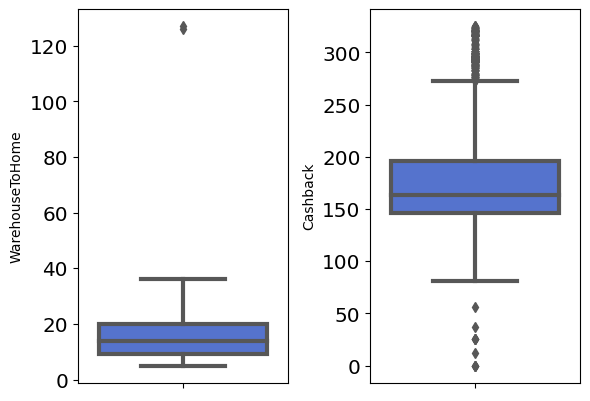

In [ ]:
# cek boxplot sebelum
plt.figure(figsize=(6, 8))
for i in range(0, len(feat_otl)):
    plt.subplot(len(feat_otl),2,i+1)
    sns.boxplot(y=df[feat_otl[i]], color='royalblue', orient='h')
    plt.tight_layout()

In [ ]:
print(f'Jumlah baris pada dataset sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['WarehouseToHome','Cashback']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris pada dataset setelah memfilter outlier: {len(df)}')
# Hitung persentase data yang terbuang
percentage_data_loss = (len(df) - len(df_original)) / len(df_original) * 100
# Cetak persentase data yang terbuang
print(f'Persentase data yang terbuang: {percentage_data_loss}%')

Jumlah baris pada dataset sebelum memfilter outlier: 5630
Jumlah baris pada dataset setelah memfilter outlier: 5190
Persentase data yang terbuang: -7.8152753108348145%


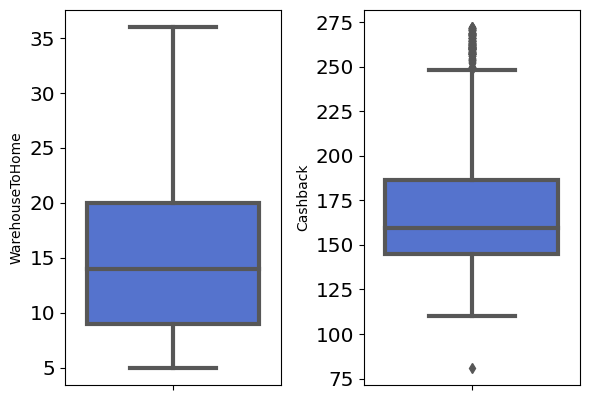

In [ ]:
# cek boxplot sesudah
plt.figure(figsize=(6, 8))
for i in range(0, len(feat_otl)):
    plt.subplot(len(feat_otl),2,i+1)
    sns.boxplot(y=df[feat_otl[i]], color='royalblue', orient='h')
    plt.tight_layout()

* Selisih mean dan median setelah melalui proses penghapusan outliers berkurang dibandingkan sebelum outliers dihapus.
* Penghapusan outlier dilakukan pada data numerical yang memiliki global outliers.

### D. Feature transformation

#### 1. NORMALIZATION/STANDARIZATION

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


* <b>  `Tenure` dan `WarehouseToHome`, distandarisasi MERUBAH bentuk sebaran data menjadi mendekati distribusi normal/mendekati, maka di lakukan standarisasi
* <b> `CashbackAmount` , `NumberOfDeviceRegistered` dan `HourSpendOnApp` di normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# CouponUsed dan OrderCount kita re-scale ke [0,1] (normalisasi)
df['CashbackAmount_normalisasi'] = MinMaxScaler().fit_transform(df['Cashback'].values.reshape(len(df), 1))
df['NumberOfDeviceRegistered_normalisasi'] = MinMaxScaler().fit_transform(df['DeviceRegistered'].values.reshape(len(df), 1))
df['DaySinceLastOrder_normalisasi'] = MinMaxScaler().fit_transform(df['DaySinceLastOrder'].values.reshape(len(df), 1))

# Tenure dan Warehouse perlu distandarisasi untuk mendapatkan data dengan distribusi normal
df['std_Tenure'] = StandardScaler().fit_transform(df['Tenure'].values.reshape(len(df), 1))
df['std_WarehouseToHome'] = StandardScaler().fit_transform(df['WarehouseToHome'].values.reshape(len(df), 1))

# OrderAmountHikeFromlastYear tidak perlu ditransformasi
# HourSpendOnApp tidak perlu di transformasi
# CouponUsed tidak perlu di transformasi
# OrderCount tidak perlu ditransformasi
# NumberofAddress tidak perlu ditransformasi

<b> Feature `Standarisasi` digunakan dalam feature transformation karena :
* Feature ini dapat merubah bentuk sebaran menjadi mendekati distribusi normal
* Range ketika standarisasi tidak terlalu loose dan nilainya adalah real. tidak seperti log transformation yang memungkinkan nilainya NaN dan Infinity (karena value dari feature). jadi, log transformation tidak disarankan pada case ini.

In [ ]:
# cek keberhasilan feature transformation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5190.0,5.279387e+04,1626.044506,50001.000000,51386.250000,52767.500000,54199.750000,55630.000000
Churn,5190.0,1.788054e-01,0.383226,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5190.0,9.274566e+00,7.879290,0.000000,2.000000,8.000000,14.000000,51.000000
CityTier,5190.0,1.664355e+00,0.920349,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5190.0,1.568170e+01,8.099237,5.000000,9.000000,14.000000,20.000000,36.000000
HourSpendOnApp,5190.0,2.930547e+00,0.705287,0.000000,2.000000,3.000000,3.000000,5.000000
DeviceRegistered,5190.0,3.680732e+00,1.031399,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5190.0,3.065703e+00,1.382558,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5190.0,4.160886e+00,2.585022,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5190.0,2.884393e-01,0.453080,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
nums_after_transform = ['std_Tenure', 'std_WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered_normalisasi','SatisfactionScore', 'DaySinceLastOrder_normalisasi','NumberOfAddress', '%IncreaseOrderLY', 'CouponUsed', 'OrderCount', 'CashbackAmount_normalisasi']

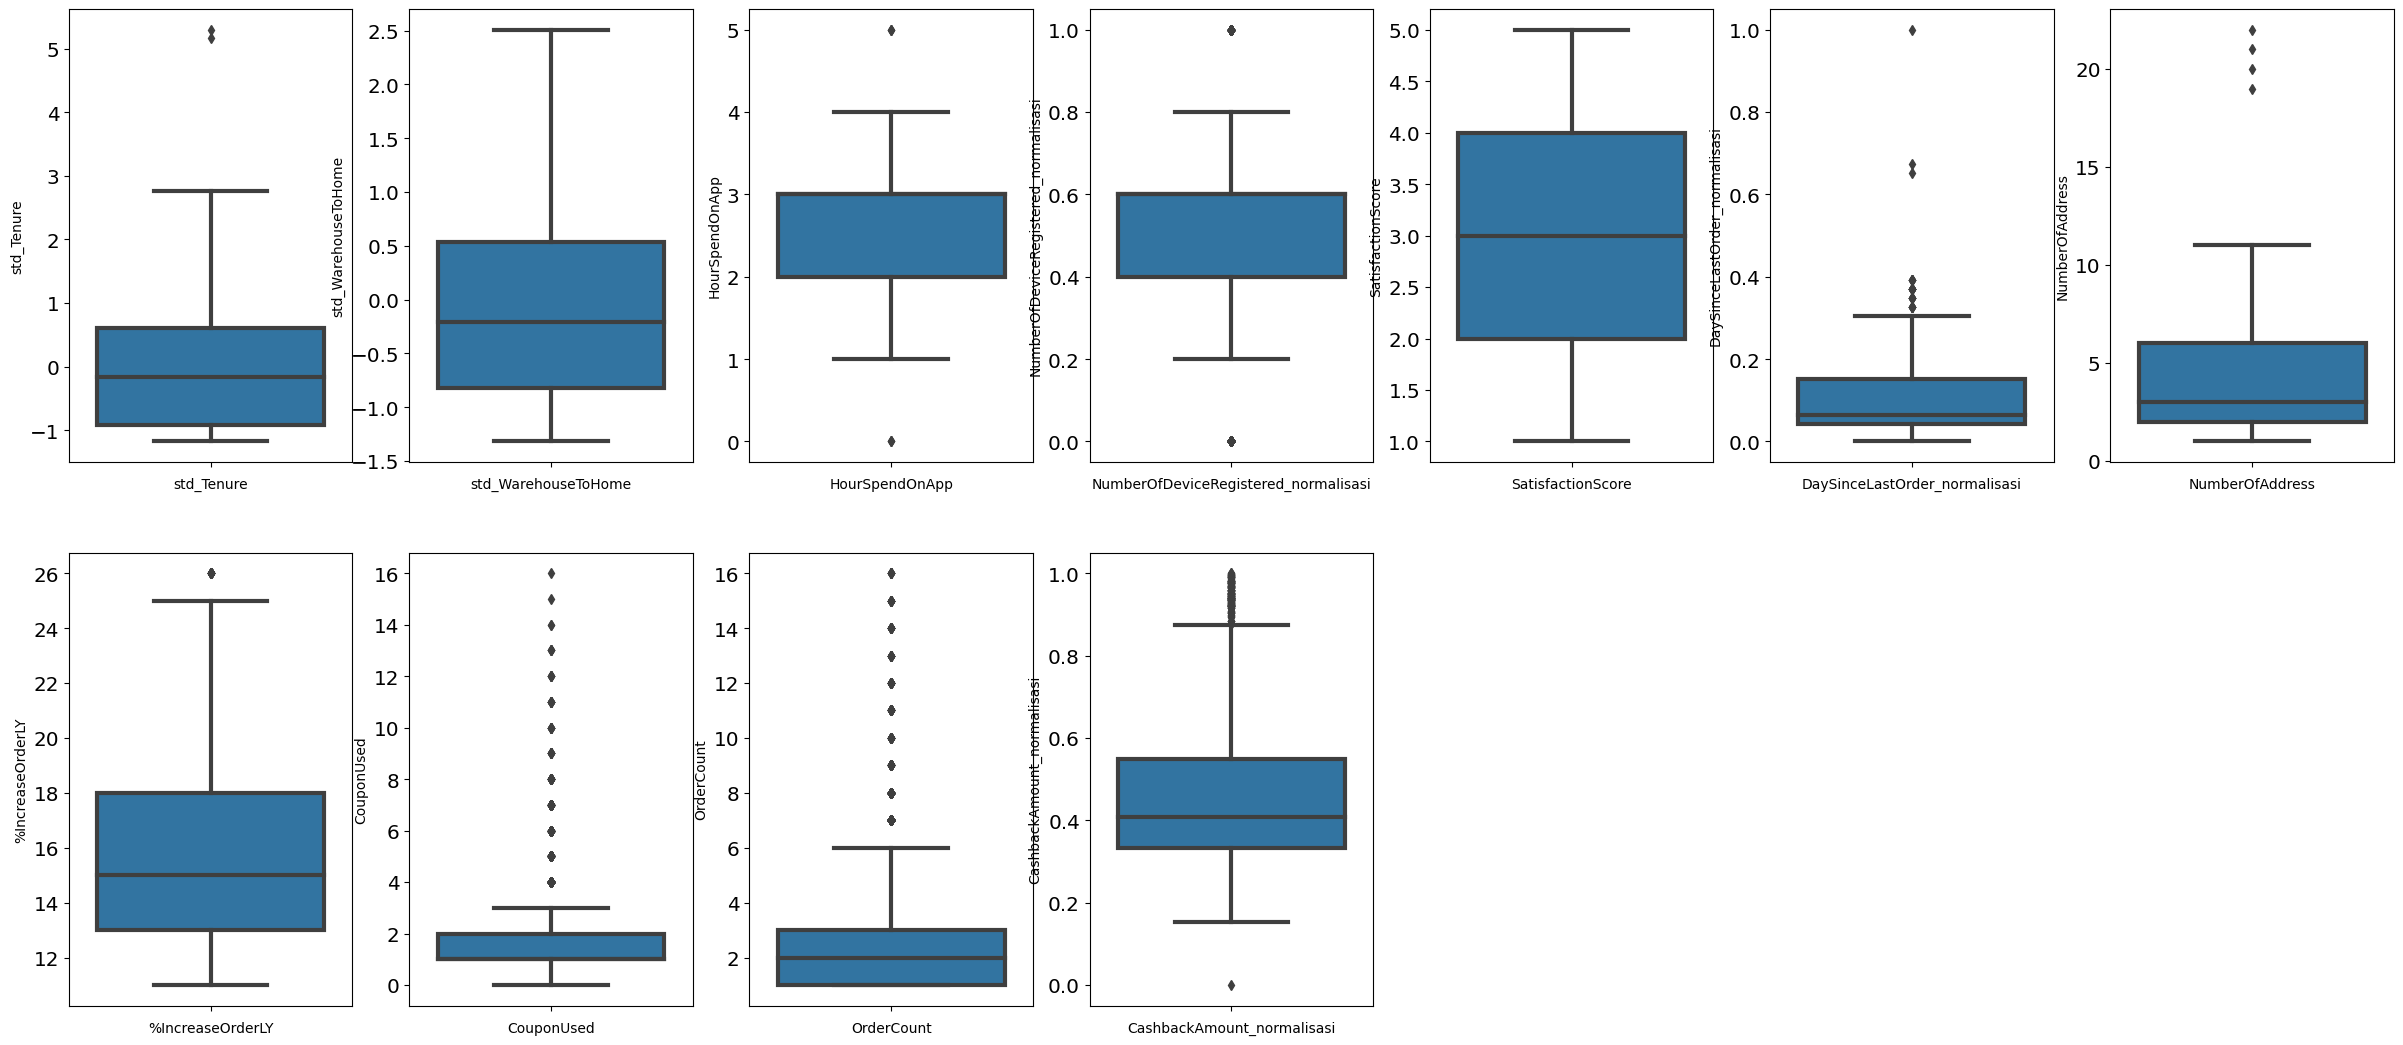

In [ ]:
plt.figure(figsize=(30,20))
features = nums_after_transform
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df[features[i]], orient='v')
    plt.xlabel(features[i])

<b> Note :
* Jika dilihat dari distribusi data setelah standarisasi, range/point antar value tidak terlalu ekstrim, atau masih dapat ditolerir maka data ini sudah aman untuk dilakukan proses selanjutnya

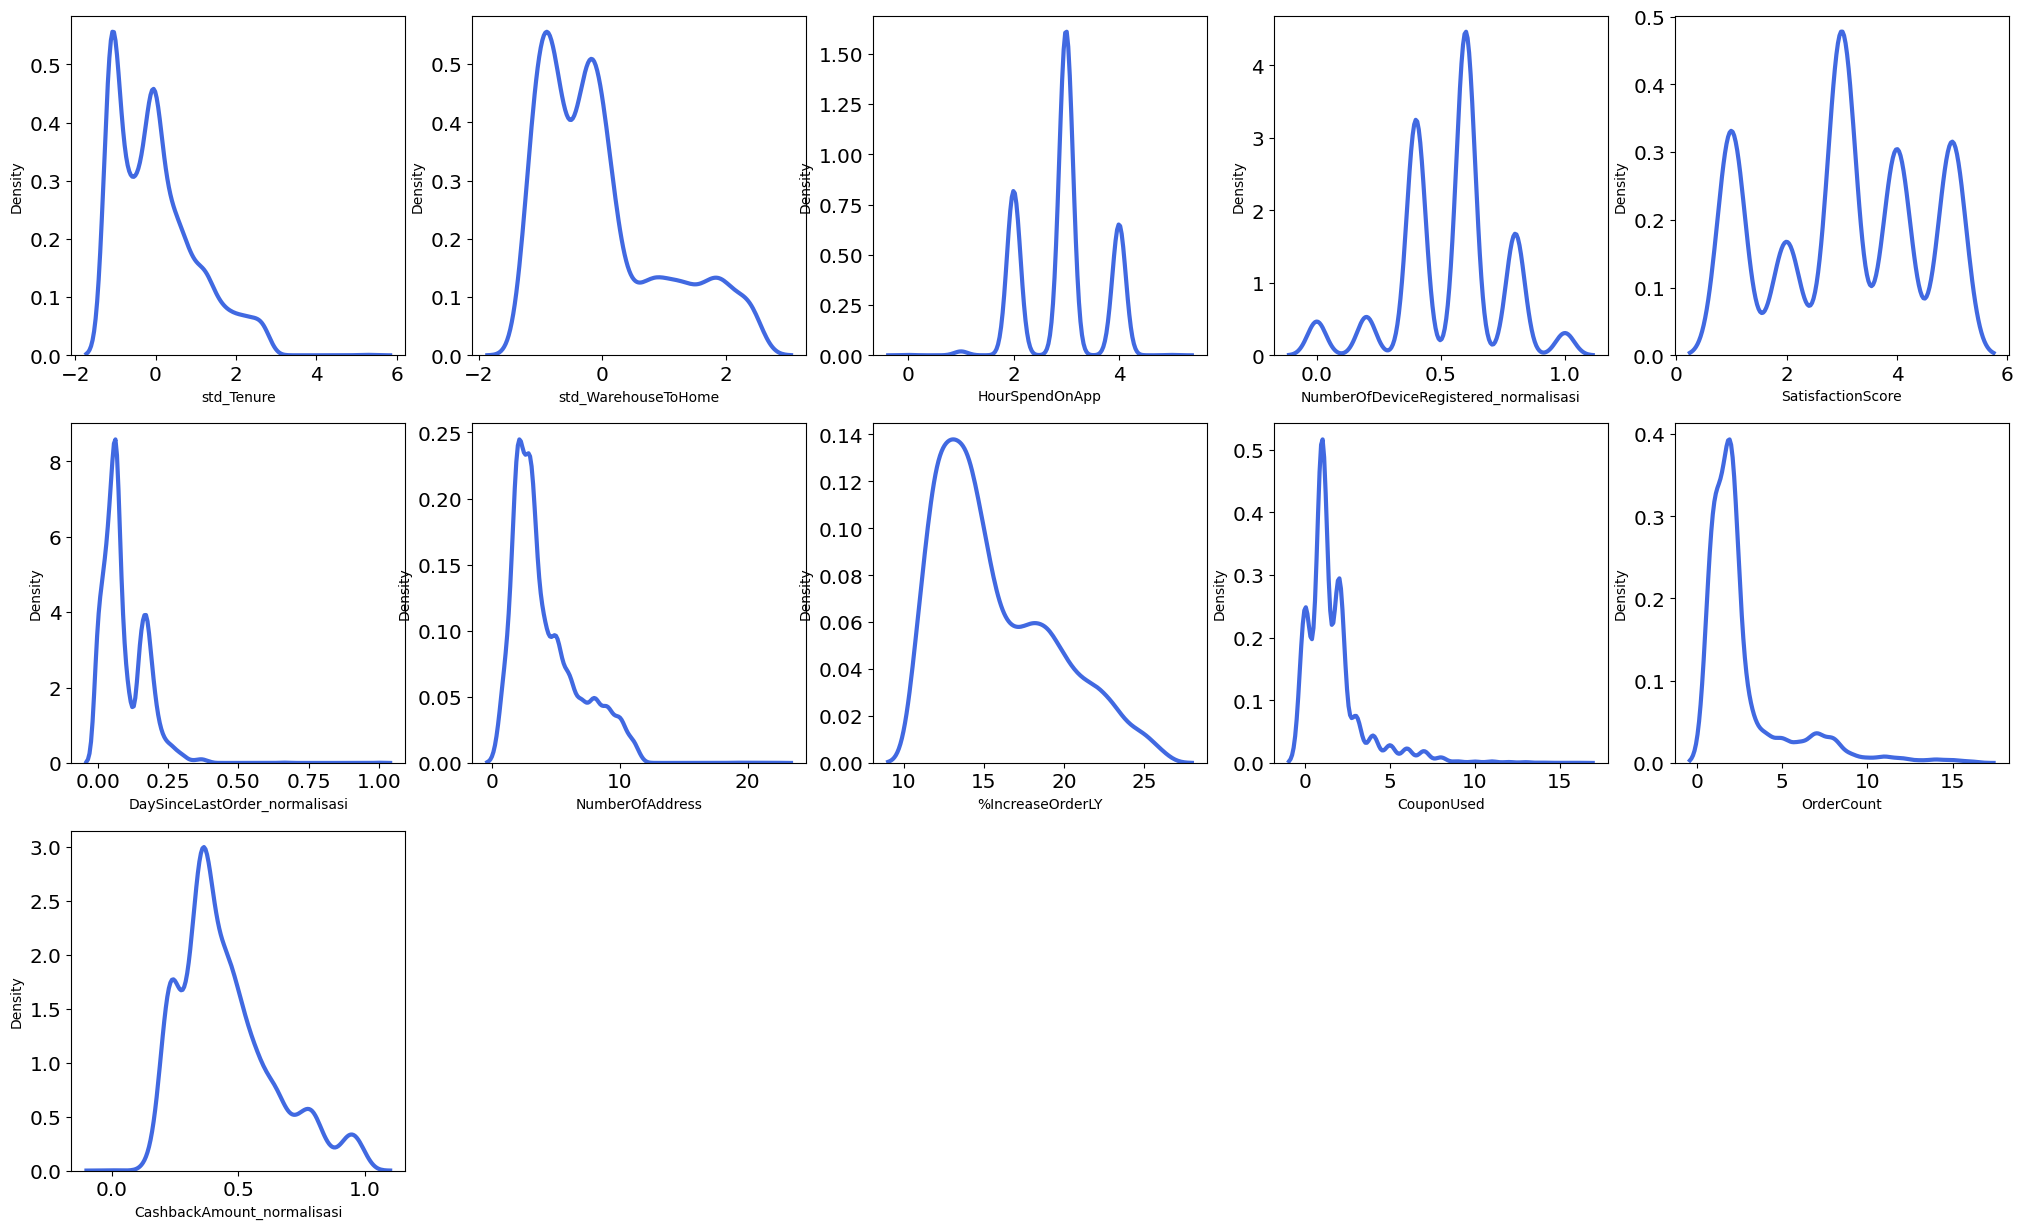

In [ ]:
features = nums_after_transform
plt.figure(figsize=(25, 15))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[features[i]], color='royalblue')
    plt.xlabel(features[i])

### E. FEATURE ENCODING

In [13]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.shape

(5190, 25)

In [ ]:
cats_update1 = ['MaritalStatus', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat']
df[cats].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CityTier,5190.0,1.664355,0.920349,1.0,1.0,1.0,3.0,3.0


In [ ]:
cats_updated = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']

<b>Strategi encoding
* `Gender` \: label encoding
* `MaritalStatus`, `PreferredLoginDevice`, `PreferedOrderCat` \: One Hot Encoding

In [14]:
# Mapping Gender
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}
df['Gender'] = df['Gender'].map(mapping_gender)

In [17]:
df['Gender'] = df['Gender'].map(mapping_gender)
for cat in ['MaritalStatus', 'PreferredLoginDevice', 'PreferedOrderCat']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots, rsuffix='_' + cat)
#PreferedPaymentMethod tidak perlu di feature encoding. pengaruh feature ini terhadap label sangat kecil

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       0 non-null      float64
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### F. HANDLE CLASS IMBALANCE

In [ ]:
# pembuatan binary label target yang imbalance (sebagai contoh)
df['churn_class'] = df['Churn'] > 0.8
df['churn_class'].value_counts()

False    4682
True      948
Name: churn_class, dtype: int64

In [ ]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Churn', 'churn_class']]]
y = df['churn_class'].values
print(X.shape)
print(y.shape)


(5630, 27)
(5630,)


### 2.Feature Engineering

# Feature Selection



In [ ]:
df1 = df.copy()
df1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,churn_class
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,NaN,3.0,3,...,0,1,0,0,0,1,0,0,0,True
1,50002,1,NaN,Phone,1,8.0,UPI,NaN,3.0,4,...,0,0,1,0,0,0,1,0,0,True
2,50003,1,NaN,Phone,1,30.0,Debit Card,NaN,2.0,4,...,0,0,1,0,0,0,1,0,0,True
3,50004,1,0.0,Phone,3,15.0,Debit Card,NaN,2.0,4,...,0,0,1,0,0,1,0,0,0,True
4,50005,1,0.0,Phone,1,12.0,CC,NaN,NaN,3,...,0,0,1,0,0,0,1,0,0,True


In [ ]:
df1.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Phone', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'churn_class'],
      dtype='object')

In [ ]:
df1= df1.drop(columns=['PreferredLoginDevice', 'MaritalStatus','PreferredPaymentMode','PreferedOrderCat'])

Text(0.5, 1.0, 'Korelasi')

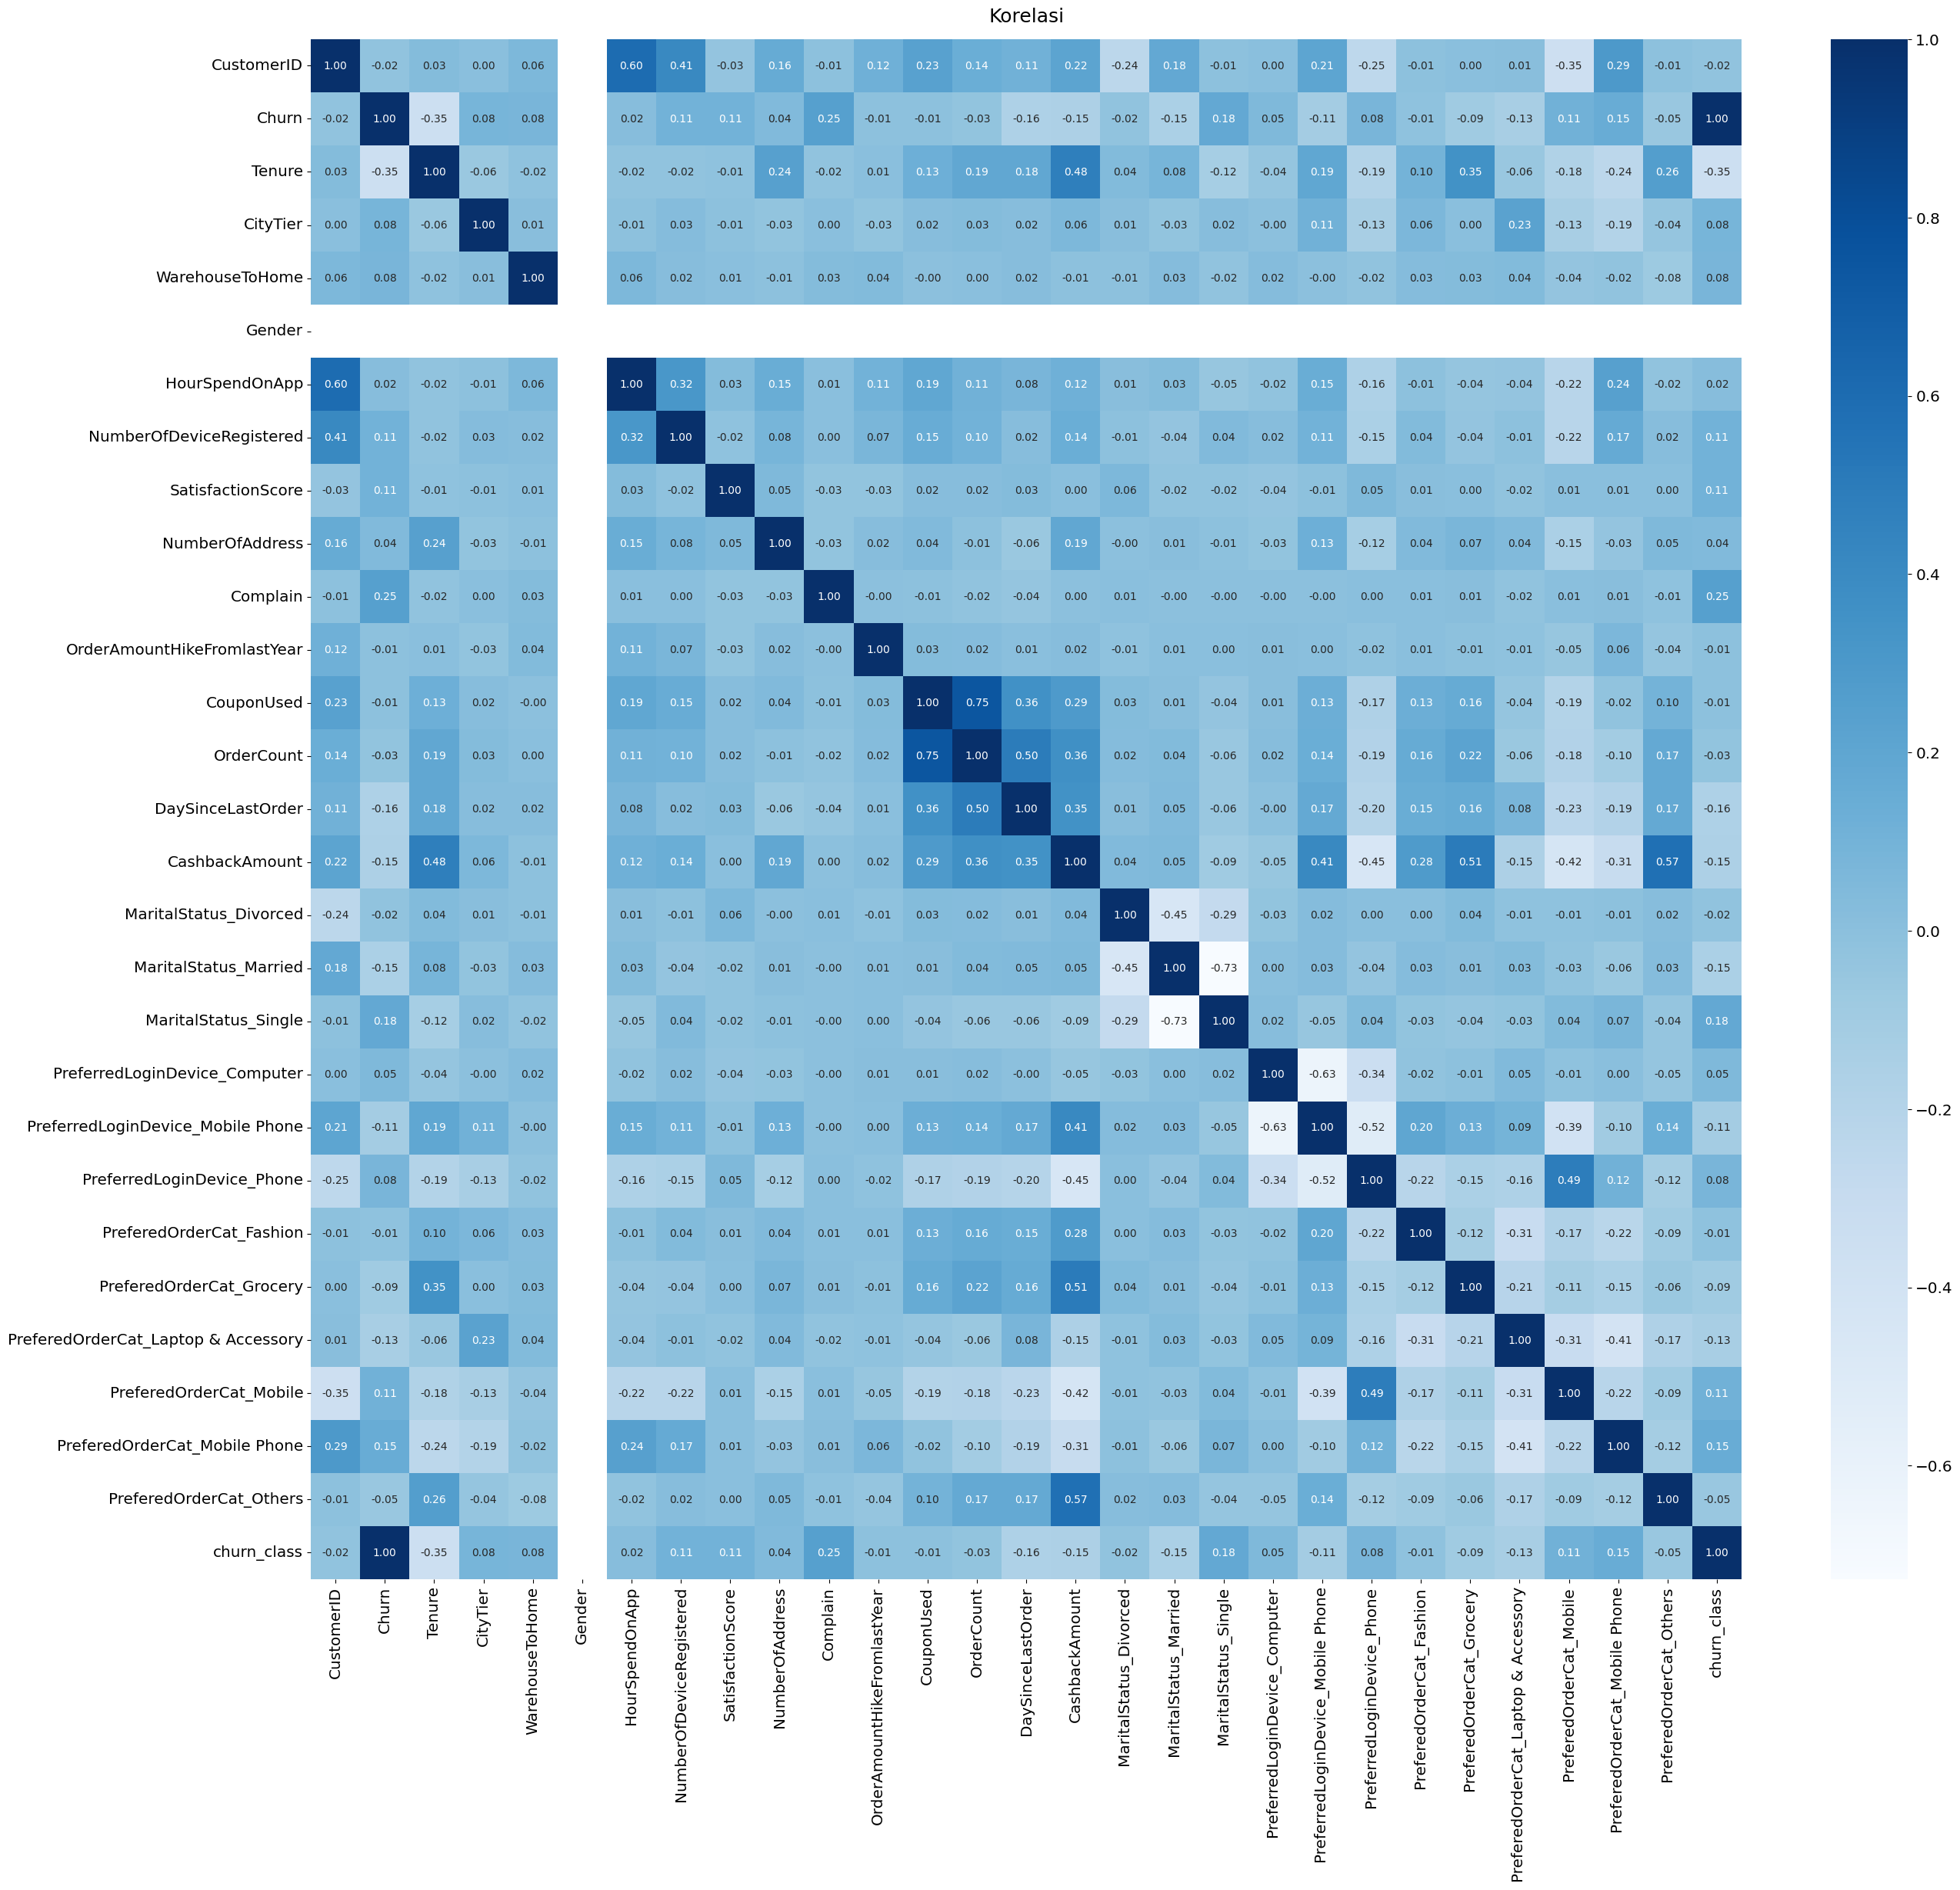

In [ ]:
#melihat kembali korelasi fitur terhadap label (churn)
plt.figure(figsize = (30, 26))
heatmaps=sns.heatmap(df1.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

In [ ]:
df2= df1.drop(columns=['CustomerID', 'Tenure','NumberOfDeviceRegistered', 'WarehouseToHome',
                        'DaySinceLastOrder', 'CashbackAmount', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'Gender' ])

Text(0.5, 1.0, 'Korelasi')

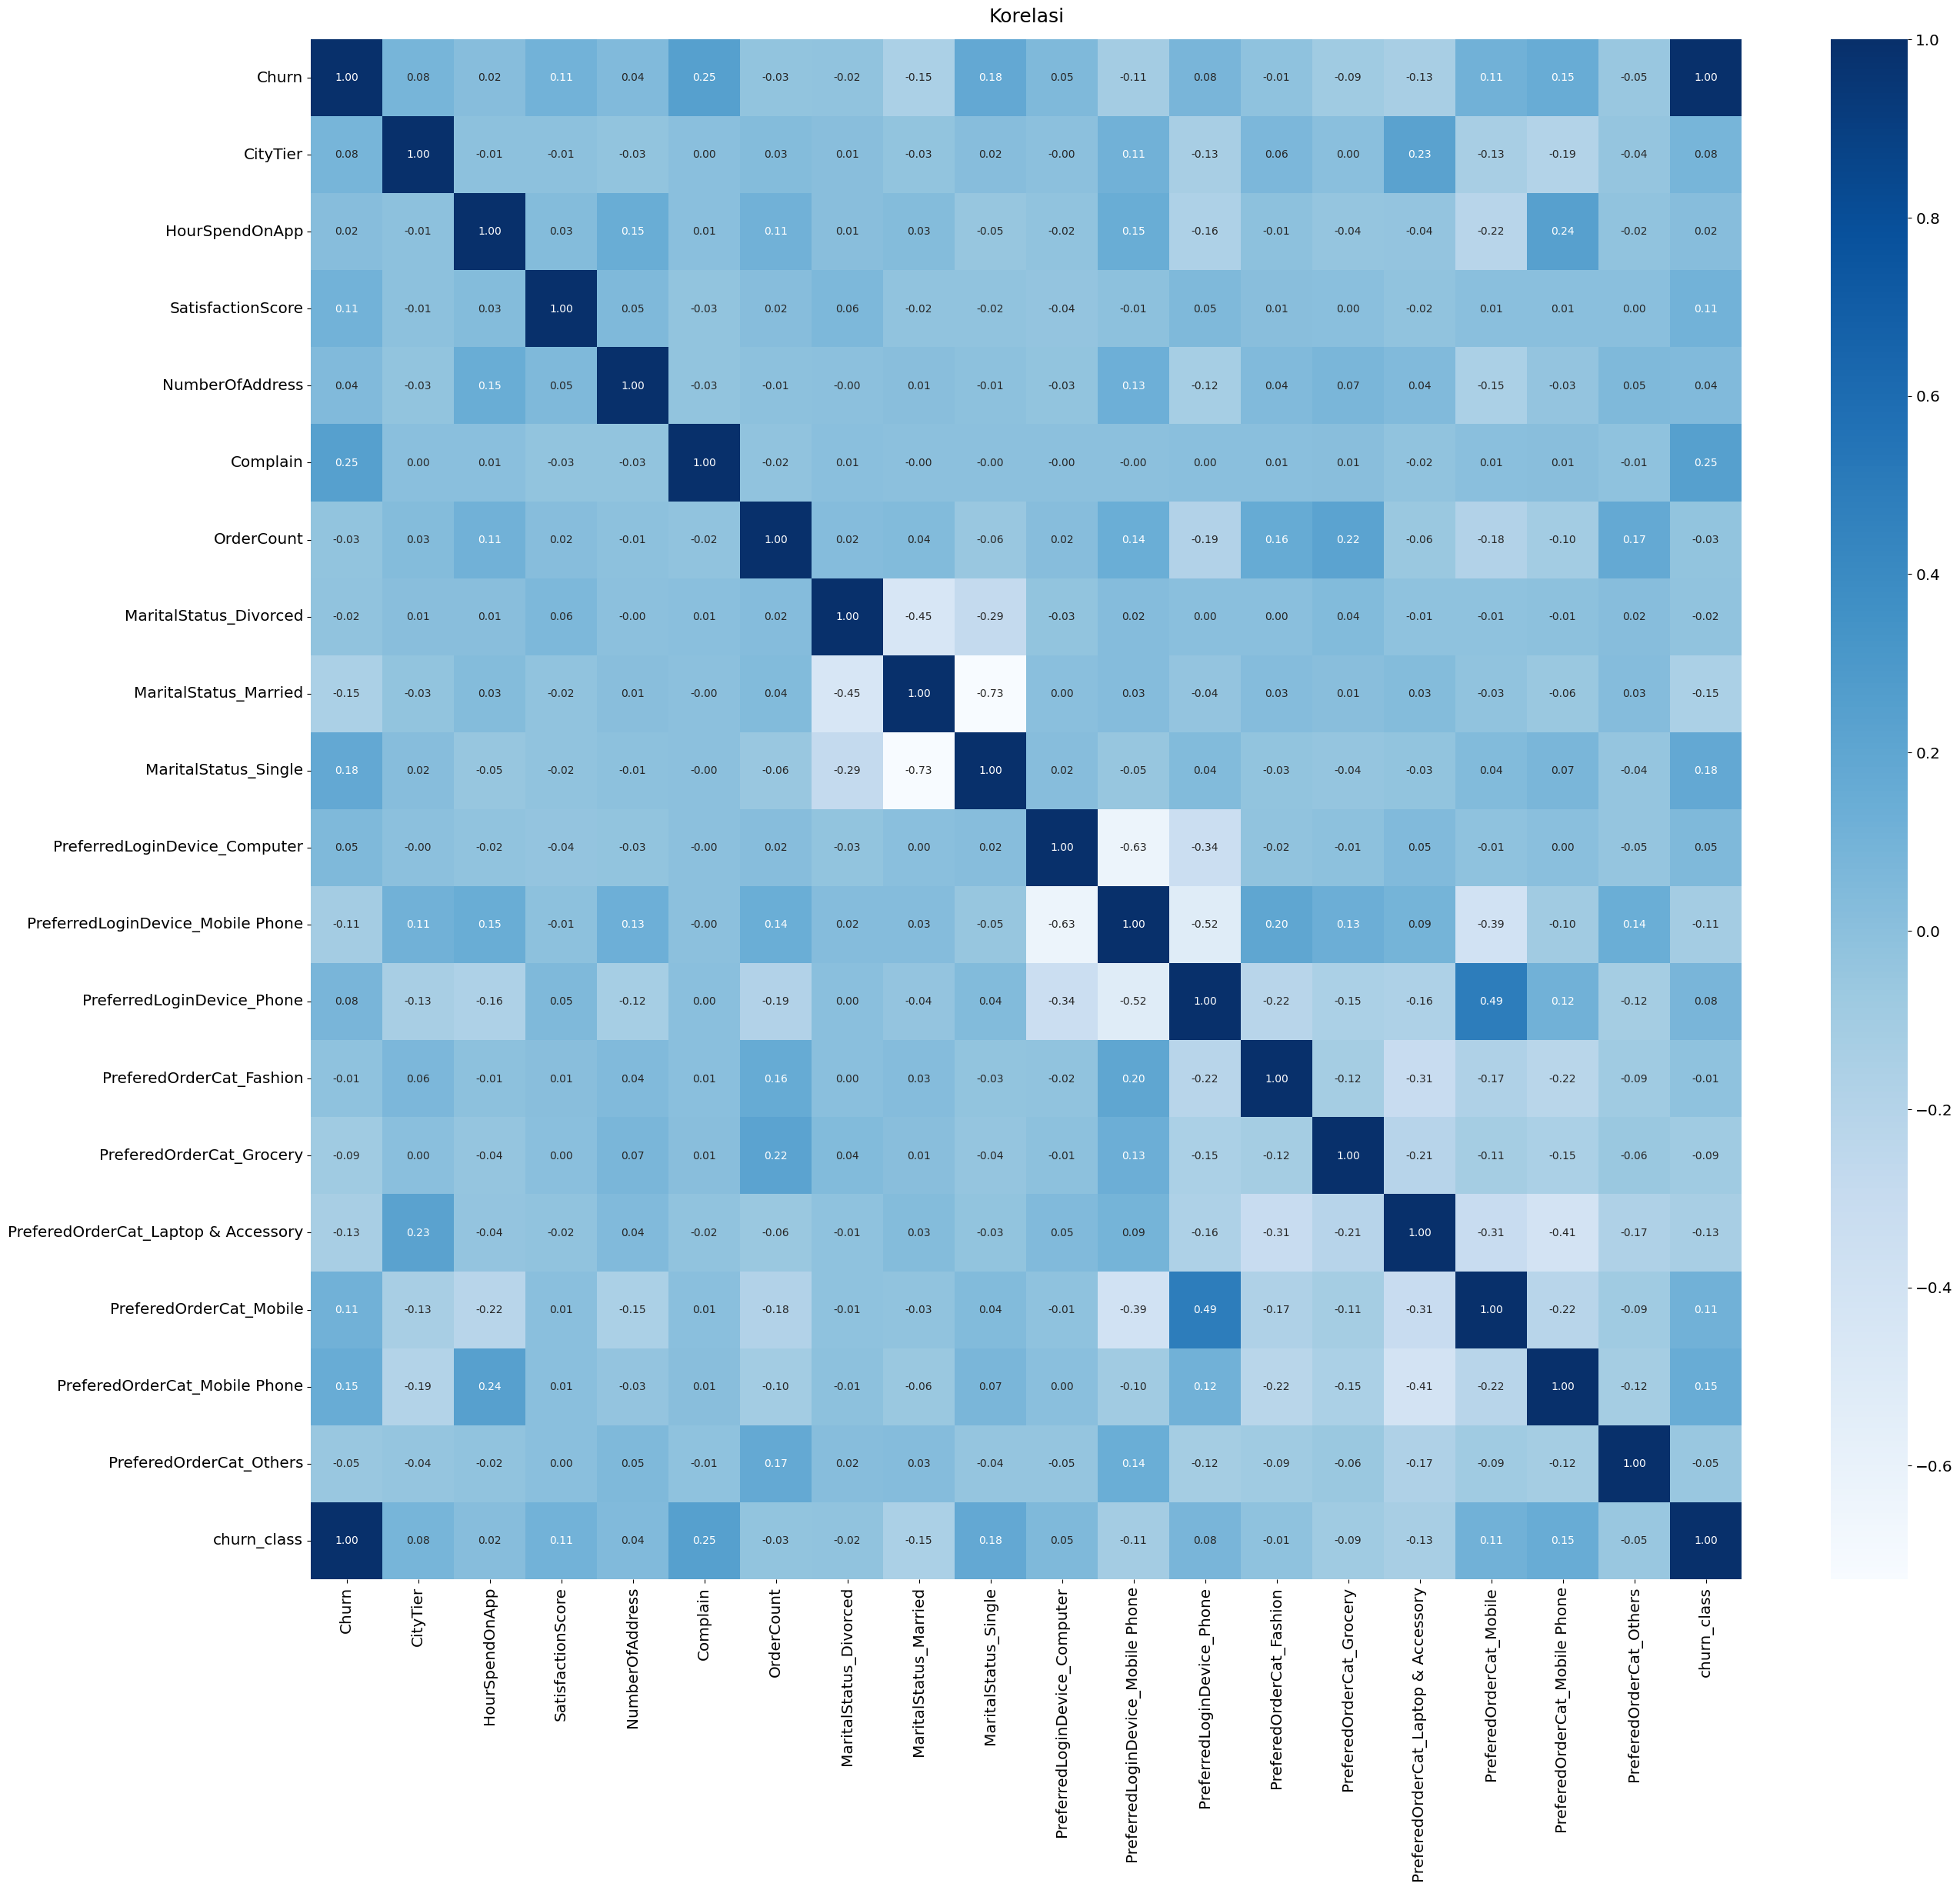

In [ ]:
#melihat kembali korelasi fitur terhadap label (churn)
plt.figure(figsize = (30, 26))
heatmaps=sns.heatmap(df2.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5630 non-null   int64  
 1   CityTier                             5630 non-null   int64  
 2   HourSpendOnApp                       5375 non-null   float64
 3   SatisfactionScore                    5630 non-null   int64  
 4   NumberOfAddress                      5630 non-null   int64  
 5   Complain                             5630 non-null   int64  
 6   OrderCount                           5372 non-null   float64
 7   MaritalStatus_Divorced               5630 non-null   uint8  
 8   MaritalStatus_Married                5630 non-null   uint8  
 9   MaritalStatus_Single                 5630 non-null   uint8  
 10  PreferredLoginDevice_Computer        5630 non-null   uint8  
 11  PreferredLoginDevice_Mobile Ph

# Feature Extraction

In [ ]:
df2.head()

,Churn,CityTier,HourSpendOnApp,SatisfactionScore,NumberOfAddress,Complain,OrderCount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,churn_class
0,1,3,3.0,2,9,1,1.0,0,0,1,0,1,0,0,0,1,0,0,0,True
1,1,1,3.0,3,7,1,1.0,0,0,1,0,0,1,0,0,0,1,0,0,True
2,1,1,2.0,3,6,1,1.0,0,0,1,0,0,1,0,0,0,1,0,0,True
3,1,3,2.0,5,8,0,1.0,0,0,1,0,0,1,0,0,1,0,0,0,True
4,1,1,NaN,5,3,0,1.0,0,0,1,0,0,1,0,0,0,1,0,0,True


In [ ]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.0,0.0,0.0,1.0
CityTier,5630.0,1.654707,0.915389,1.0,1.0,1.0,3.0,3.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.0,3.0,4.0,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.0,3.0,6.0,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.0,0.0,1.0,1.0
OrderCount,5372.0,3.008004,2.939680,1.0,1.0,2.0,3.0,16.0
MaritalStatus_Divorced,5630.0,0.150622,0.357711,0.0,0.0,0.0,0.0,1.0
MaritalStatus_Married,5630.0,0.530373,0.499121,0.0,0.0,1.0,1.0,1.0
MaritalStatus_Single,5630.0,0.319005,0.466133,0.0,0.0,0.0,1.0,1.0


In [ ]:
klasifikasi = []

for i, kolom in df2.iterrows():
    if kolom ['OrderCount'] < 4:
        result = 'Bronze'
    elif kolom ['OrderCount'] < 9 and kolom ['OrderCount'] >=8 :
        result = 'Silver'
    else :
        result = 'Gold'
    klasifikasi.append(result)
df2['CustomerCategory']=klasifikasi
df2


,Churn,CityTier,HourSpendOnApp,SatisfactionScore,NumberOfAddress,Complain,OrderCount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,...,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,churn_class,CustomerCategory
0,1,3,3.0,2,9,1,1.0,0,0,1,...,1,0,0,0,1,0,0,0,True,Bronze
1,1,1,3.0,3,7,1,1.0,0,0,1,...,0,1,0,0,0,1,0,0,True,Bronze
2,1,1,2.0,3,6,1,1.0,0,0,1,...,0,1,0,0,0,1,0,0,True,Bronze
3,1,3,2.0,5,8,0,1.0,0,0,1,...,0,1,0,0,1,0,0,0,True,Bronze
4,1,1,NaN,5,3,0,1.0,0,0,1,...,0,1,0,0,0,1,0,0,True,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,1,3.0,1,6,0,2.0,0,1,0,...,0,0,0,0,1,0,0,0,False,Bronze
5626,0,1,3.0,5,6,0,2.0,0,1,0,...,1,0,1,0,0,0,0,0,False,Bronze
5627,0,1,3.0,4,3,1,2.0,0,1,0,...,1,0,0,0,1,0,0,0,False,Bronze
5628,0,3,4.0,4,4,0,2.0,0,1,0,...,0,0,0,0,1,0,0,0,False,Bronze


In [ ]:
# Mapping CustomerCategory
mapping_CustomerCategory = {
    'Bronze' : 0,
    'Silver' : 1,
    'Gold' : 2
}
df2['CustomerCategory'] = df2['CustomerCategory'].map(mapping_CustomerCategory)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5630 non-null   int64  
 1   CityTier                             5630 non-null   int64  
 2   HourSpendOnApp                       5375 non-null   float64
 3   SatisfactionScore                    5630 non-null   int64  
 4   NumberOfAddress                      5630 non-null   int64  
 5   Complain                             5630 non-null   int64  
 6   OrderCount                           5372 non-null   float64
 7   MaritalStatus_Divorced               5630 non-null   uint8  
 8   MaritalStatus_Married                5630 non-null   uint8  
 9   MaritalStatus_Single                 5630 non-null   uint8  
 10  PreferredLoginDevice_Computer        5630 non-null   uint8  
 11  PreferredLoginDevice_Mobile Ph

In [ ]:
# drop kolom2 ordercount
df2 = df2.drop(columns=['OrderCount'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5630 non-null   int64  
 1   CityTier                             5630 non-null   int64  
 2   HourSpendOnApp                       5375 non-null   float64
 3   SatisfactionScore                    5630 non-null   int64  
 4   NumberOfAddress                      5630 non-null   int64  
 5   Complain                             5630 non-null   int64  
 6   MaritalStatus_Divorced               5630 non-null   uint8  
 7   MaritalStatus_Married                5630 non-null   uint8  
 8   MaritalStatus_Single                 5630 non-null   uint8  
 9   PreferredLoginDevice_Computer        5630 non-null   uint8  
 10  PreferredLoginDevice_Mobile Phone    5630 non-null   uint8  
 11  PreferredLoginDevice_Phone    

Text(0.5, 1.0, 'Korelasi')

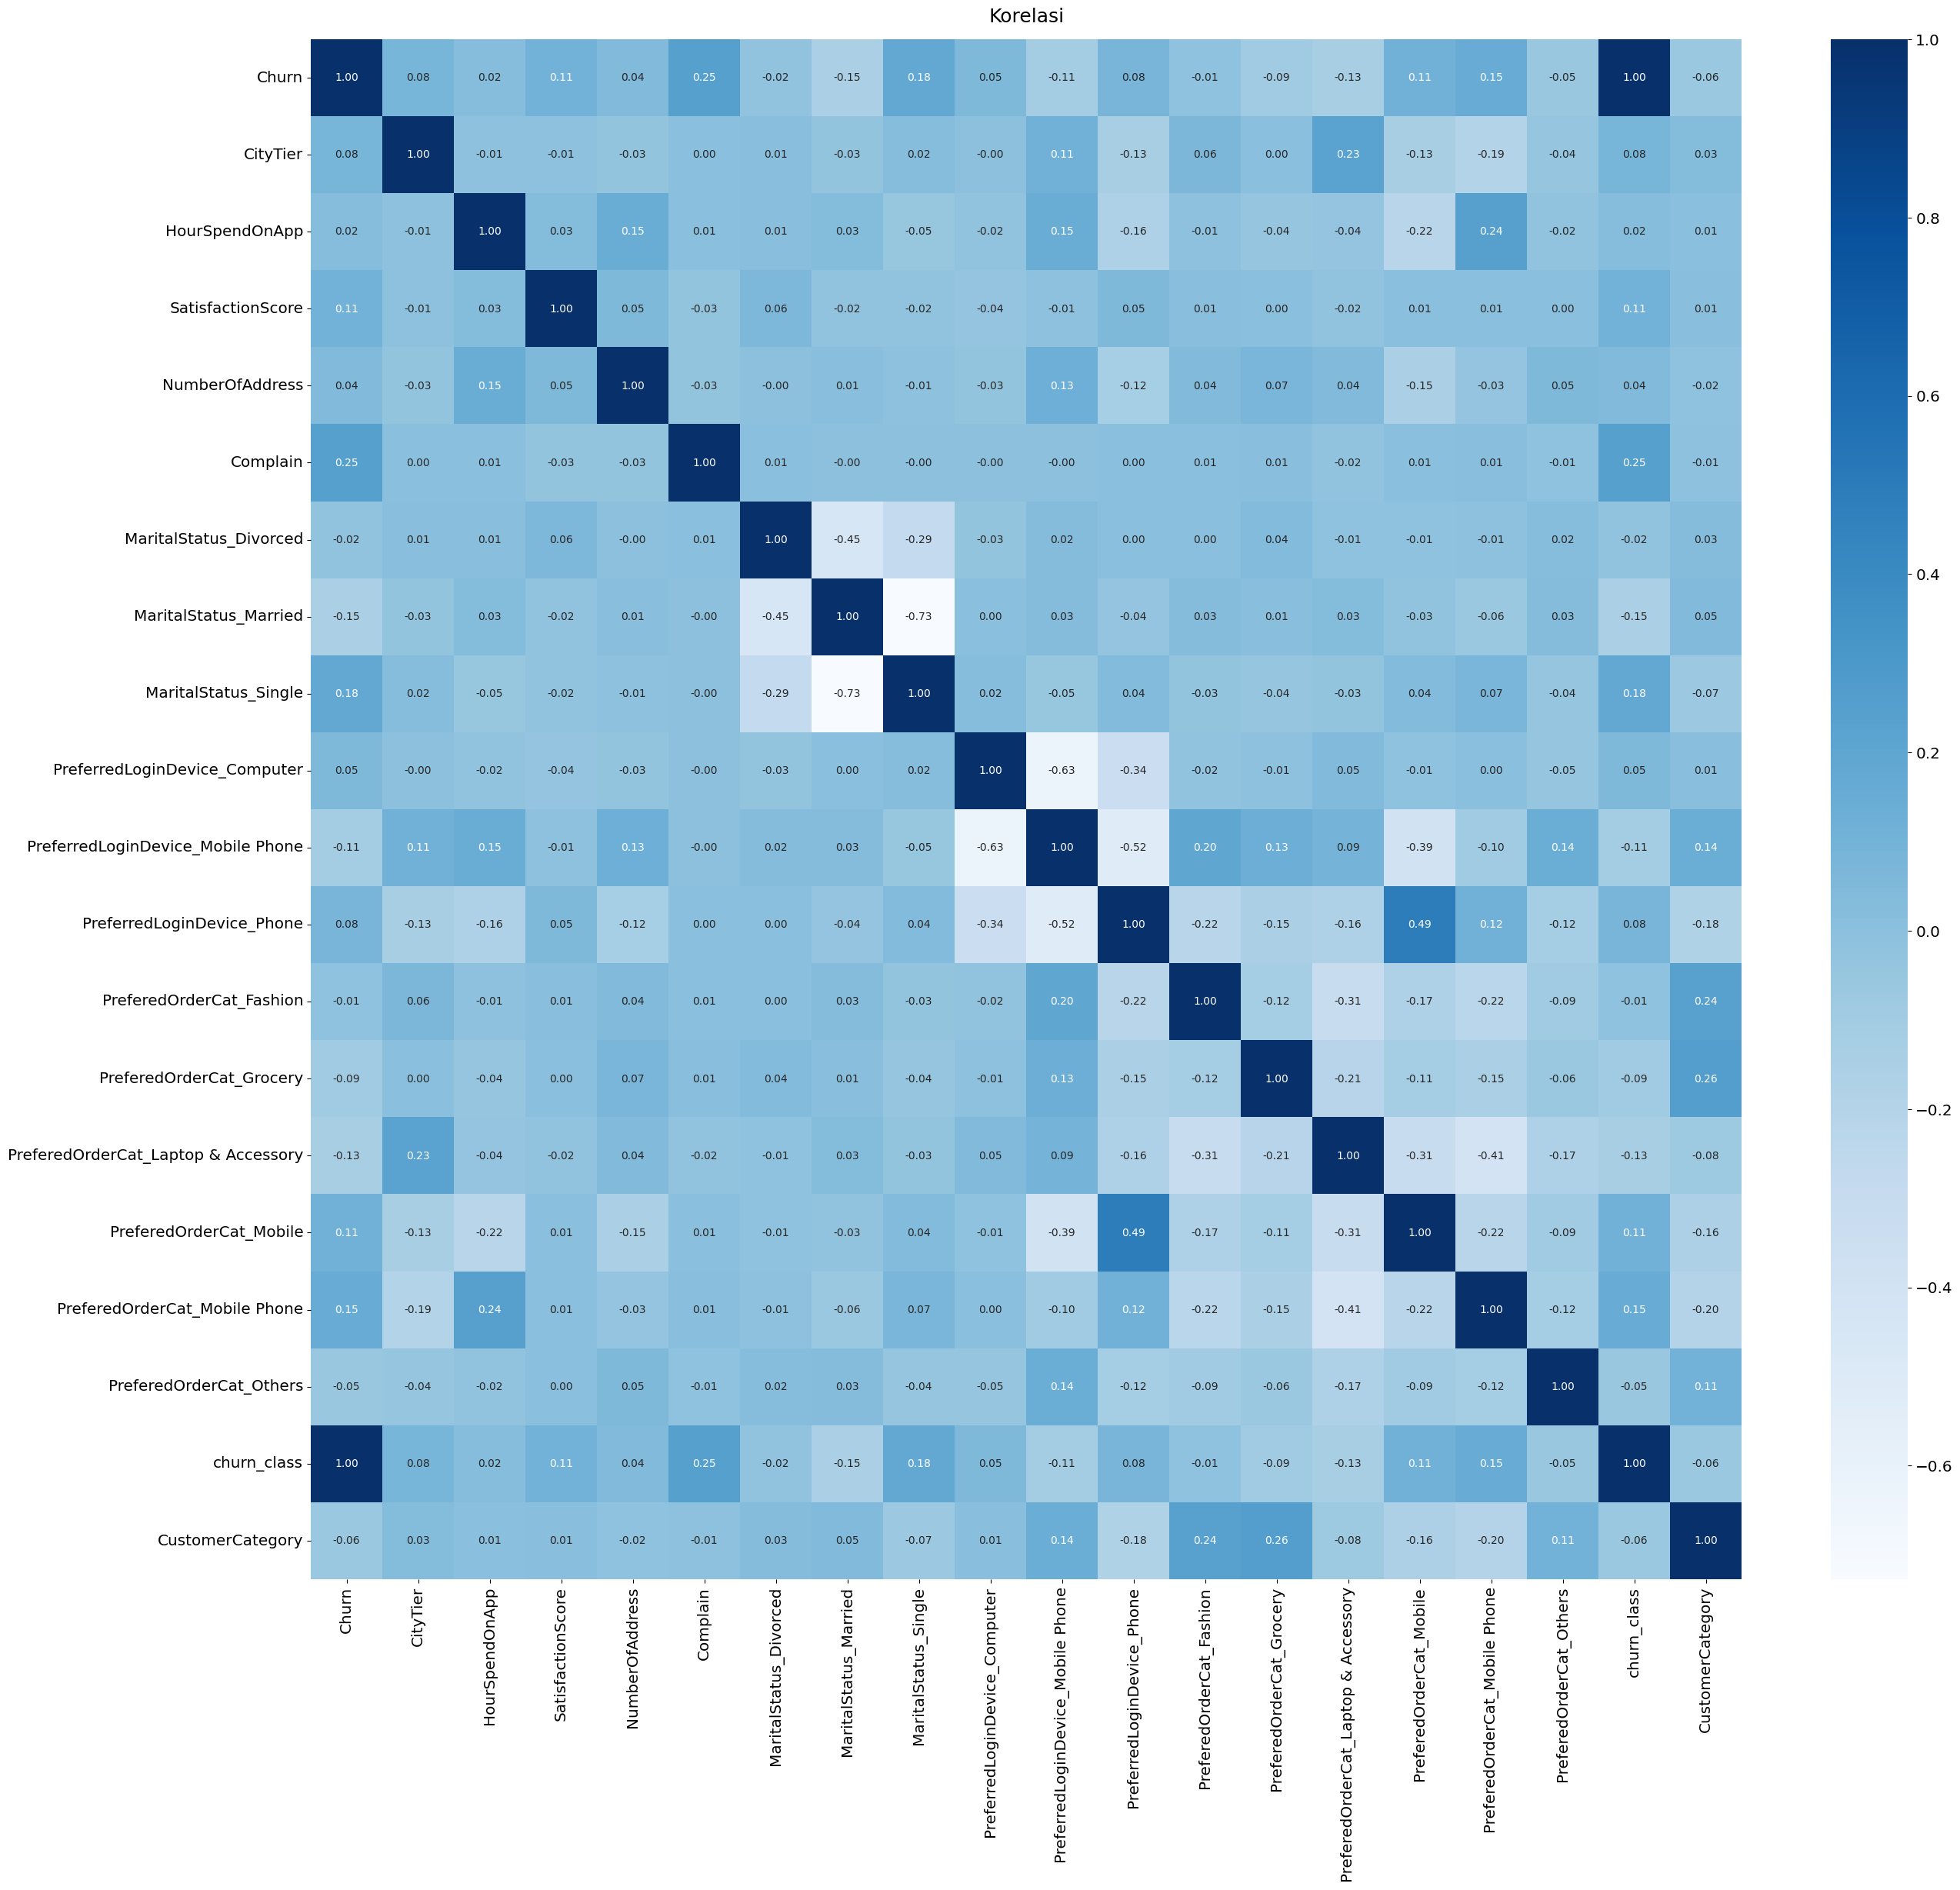

In [ ]:
#melihat kembali korelasi fitur terhadap label (churn)
plt.figure(figsize = (30, 26))
heatmaps=sns.heatmap(df2.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

## Tuliskan minimal 4 feature tambahan

* <b> Membuat suka-tidak suka dari satisfaction score,
sangat tidak puas - tidak puas - cukup puas - puas -sangat puas
* <b> Penghasilan → dapat digunakan untuk melihat apakah besar pernghasilan yang dimiliki seorang customer berpengaruh terhadap kemampuan beli customer tersebut atau tidak.
* <b> Umur → Data umur customer dapat digunakan dalam pengelompokan customer dan melihat kecenderungan ketertarikan produk dalam setiap kelompok, yang kemudian dapat digunakan untuk melakukan promosi terhadap produk-produk yang mungkin disukai oleh kelompok usia tertentu.
* <b> Total Charges → Dengan mengetahui jumlah pengeluaran seorang customer di e-commerce, dapat diprediksi seberapa loyal customer tersebut.
* <b> Total transaction/spend → Informasi ini bermanfaat dalam memprediksi seberapa sering seorang customer melakukan transaksi.
* <b> Profession → Data mengenai profesi yang dimiliki seorang customer dapat digunakan untuk membuat pengklasifikasian, profesi apa lebih banyak melakukan pembelian kategori produk apa.
* <b> Ongkos kirim → Besar biaya pengiriman yang dibebankan kepada customer, juga dapat digunakan untuk memprediksi seberapa loyal seorang customer.
* <b> Transaction Time/waktu transaksi → Informasi mengenai waktu transaksi ini dapat digunakan dalam memperkirakan waktu yang tepat ketika hendak melakukan promosi, sehingga promosi yang dilakukan dapat menjangkau lebih banyak customer. <br><br>

Dengan tambahan feature-feature di atas, kami berpendapat bahwa model machine learning yang dibuat akan semakin efektif dan tepat sasaran.